In [2]:
#tutorial by: https://www.kaggle.com/punit0811/machine-learning-project-basic-linear-regression/notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
sn.set_palette("GnBu_d")
sn.set_style('whitegrid')

In [3]:
import os
print(os.listdir("../supervised"))

['Classification', 'CSV', 'ecommerce-linear-regression.ipynb', 'how_to_use_re.ipynb', 'Linear_reg_based_on_gradient_descent.ipynb', 'New Text Document.txt', 'preprocessing+cross validation.ipynb', 'pre_processing.ipynb', 'simple_linear_regression.ipynb', 'Time_series']


In [7]:
customers = pd.read_csv('../supervised/CSV/Ecommerce Customers')

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


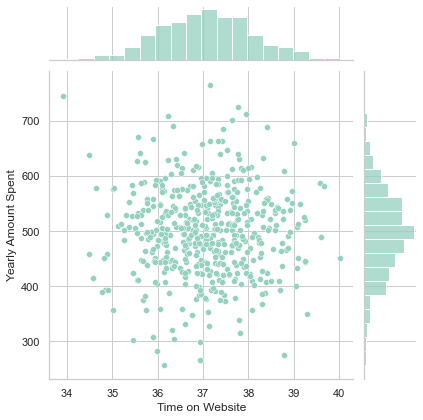

In [ ]:
sn.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

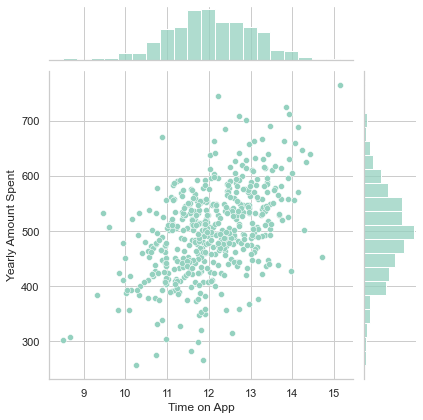

In [ ]:
sn.jointplot(y='Yearly Amount Spent', x='Time on App', data=customers)


In [ ]:
y = customers['Yearly Amount Spent']
x1=customers['Time on App']
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Simin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.249
Model:                             OLS   Adj. R-squared:                  0.248
Method:                  Least Squares   F-statistic:                     165.4
Date:                 Sat, 12 Mar 2022   Prob (F-statistic):           6.91e-33
Time:                         20:53:06   Log-Likelihood:                -2824.0
No. Observations:                  500   AIC:                             5652.
Df Residuals:                      498   BIC:                             5660.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.2093     37.457      0.513      0.608     -54.383      92.802
Time on App    39.8345      3.097     12.861      0.000      33.749      45.920
==============================================================================
Omnibus:                        4.532   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                5.385
Skew:                          -0.081   Prob(JB):                       0.0677
Kurtosis:                       3.482   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

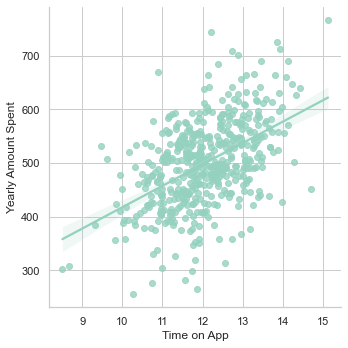

In [ ]:
sn.lmplot(x=('Time on App'),y=('Yearly Amount Spent'),data=customers)

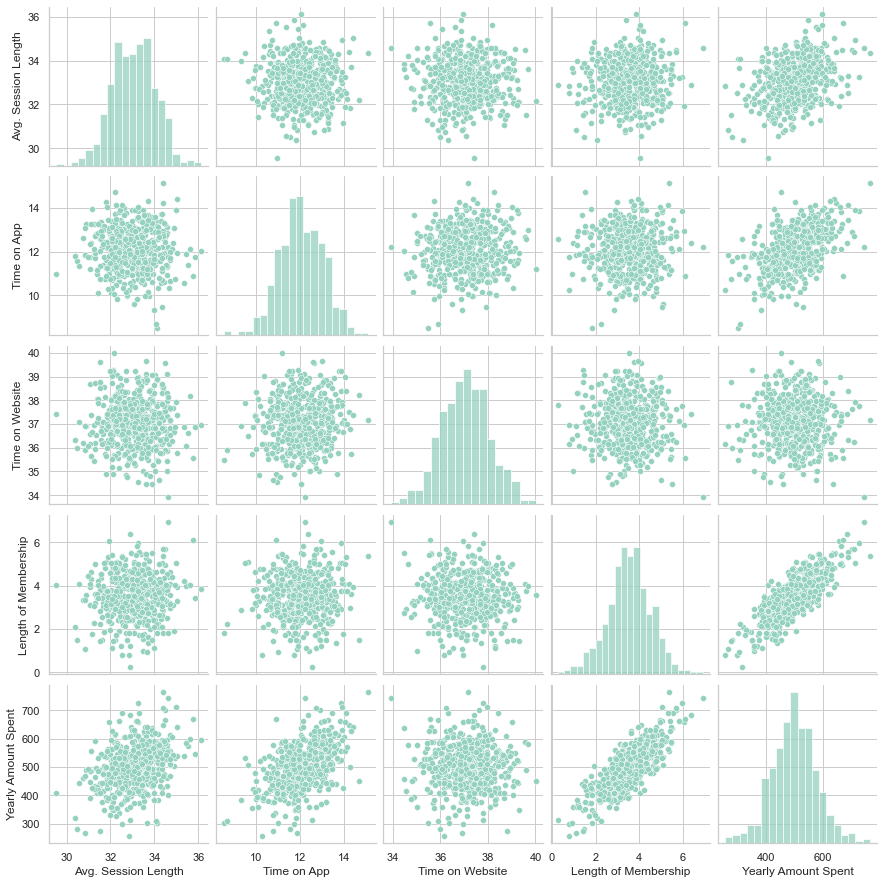

In [ ]:
sn.pairplot(customers)

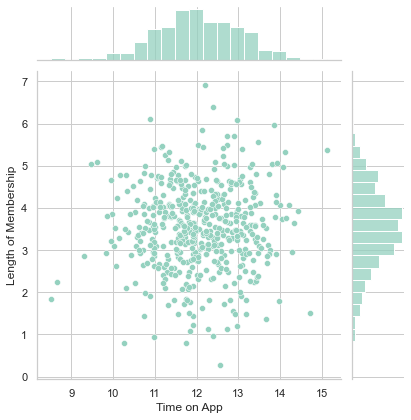

In [ ]:
sn.jointplot(x='Time on App',y='Length of Membership',data=customers)


In [ ]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split (X, y, test_size =0.3, random_state=101)

#training the model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Text(0, 0.5, 'predicted y')

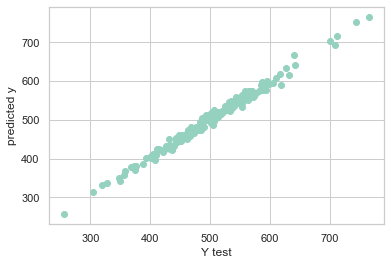

In [ ]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('predicted y')

In [ ]:

coeffecients  =pd.DataFrame(model.coef_, X.columns)
coeffecients.columns = ['coef']
coeffecients

,coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


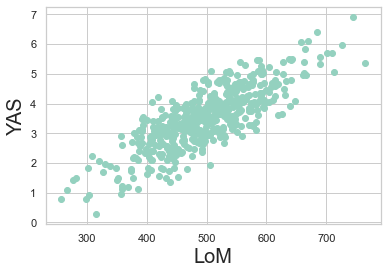

In [ ]:
y=customers['Yearly Amount Spent']
x1= customers['Length of Membership']
plt.scatter(y,x1)
plt.xlabel('LoM', fontsize=20)
plt.ylabel('YAS',fontsize=20)
plt.show()


In [ ]:
import statsmodels.api as sm
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Simin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Sun, 13 Mar 2022   Prob (F-statistic):          4.81e-117
Time:                         22:30:29   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  272.3998      7.675     35.492      0.000     257.320     287.479
Length of Membership    64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

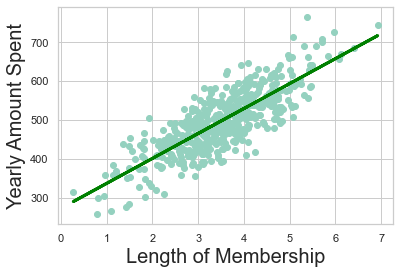

In [ ]:
yhat=272.3998+64.2187*x1
fig= plt.plot(x1,yhat, c='green', lw=3, label = 'regression line')
plt.scatter(x1,y)
plt.xlabel('Length of Membership', fontsize=20)
plt.ylabel('Yearly Amount Spent', fontsize=20)  
plt.show() 

In [8]:
from sklearn.linear_model import LinearRegression


data = pd.read_csv("../supervised/CSV/Ecommerce Customers")
x = data[["Time on App","Length of Membership"]]
y = data["Yearly Amount Spent"]
model=LinearRegression()
model.fit(x,y)

model.predict([[15.00,8.00]])


array([893.1932301])